## <center>스티커 만들기</center>

**index**

* 사진 불러오기
* 얼굴 검출 & 랜드마크 검출 하기
* 스티커 적용 위치 확인
* 스티커 적용 
* 문제점 찾기

**사진 불러오기**

In [172]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib  # 랜드마크

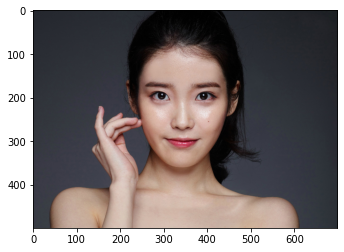

In [173]:
my_image_path = os.getenv('HOME')+'/aiffel/exploration/miniproject/Ex03/iu.jpeg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (700, 500))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

**얼굴 검출 face detection**

In [174]:
# detector 선언
detector_hog = dlib.get_frontal_face_detector()

# detector_hog를 이용한 얼굴 bounding box 추출
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)  # 얼굴 bbox 좌표

rectangles[[(241, 142) (464, 365)]]


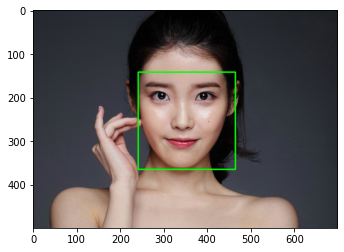

In [175]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA) 
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

이미지 bbox  ->>> dlib.rectangle의 객체의 배열

**랜드마크 검출**

In [176]:
# landmark 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [177]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


In [178]:
print(list_landmarks)

[[(239, 196), (241, 224), (246, 251), (252, 277), (263, 301), (277, 323), (295, 342), (316, 357), (338, 362), (361, 359), (384, 344), (403, 324), (420, 302), (432, 278), (439, 251), (445, 224), (448, 196), (251, 179), (265, 167), (285, 165), (306, 168), (325, 175), (361, 175), (380, 169), (400, 166), (420, 168), (435, 181), (342, 201), (342, 221), (342, 241), (342, 262), (324, 271), (333, 274), (342, 277), (352, 274), (361, 272), (274, 197), (286, 190), (300, 191), (312, 204), (298, 204), (284, 203), (373, 205), (385, 192), (399, 191), (412, 199), (401, 205), (386, 206), (301, 294), (318, 294), (332, 292), (343, 295), (352, 293), (365, 296), (381, 297), (364, 310), (350, 315), (340, 315), (329, 314), (316, 307), (307, 296), (332, 301), (342, 302), (352, 301), (375, 299), (351, 301), (341, 301), (330, 300)]]


: landmark_predictor() 를 사용해서 인자로 받은 img_rgb 이미지를 dlib.full_object_detection의 객체로 반환하고, 그 객체를 parts()함수를 사용하여 (x,y) 형태의 int tuple로 만들어주고 리스트에 넣었습니다. <br/>
즉 list_points의 (x,y)형태로 이루어진 좌표를 받은 list_landmarks는 68개의 (x,y) 로 이루어진 리스트가 된다.
</br>
</br>
ex. [(x1, y1),... , (x68, y68)]

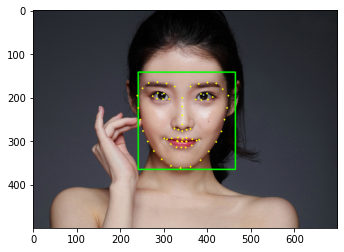

In [179]:
# 이미지에 landmark 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

**스티커 적용 위치 확인**

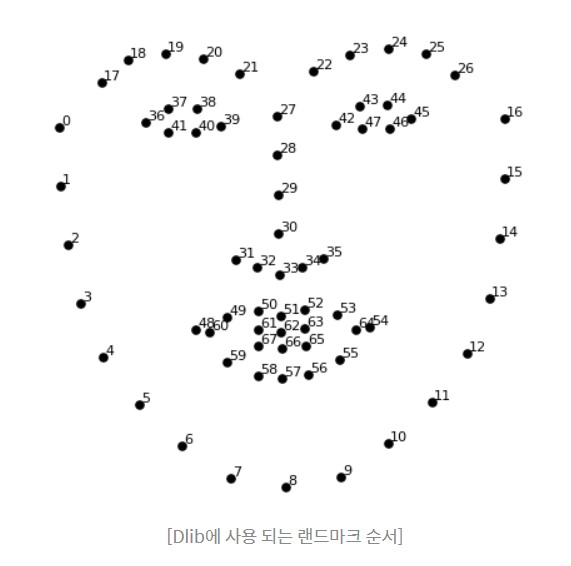

In [180]:
# 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index
    x = landmark[30][0]  # 스티커의 중앙 x 좌표
    y = landmark[30][1]  # 스티커의 중앙 y 좌표
    w = dlib_rect.width()  # bbox 너비
    h = dlib_rect.width()  # bbox 높이
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(342, 262)
(x,y) : (342,262)
(w,h) : (224,224)


(224, 224, 3)


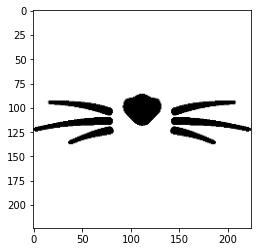

In [181]:
sticker_path = os.getenv('HOME')+'/aiffel/exploration/miniproject/Ex03/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
print(img_sticker.shape) 
plt.imshow(img_sticker)
plt.show()

**스티커 적용**

In [182]:
refined_x = x - w // 2
refined_y = y - h // 2
print('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (230,150)


In [183]:

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)


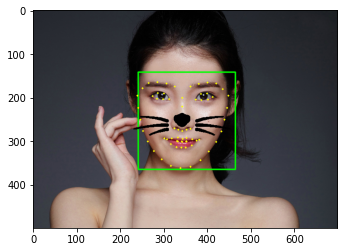

In [184]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

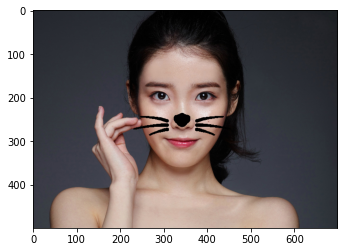

In [185]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

: [from : to] 형식
<br/>
즉, [좌측 상단 y좌표: 우측 하단 y 좌표, 좌측 상단 x좌표: 우측 하단 x 좌표] = \\
<br/>
* 스티커의 좌측 상단 좌표 = 스티커 중앙 y 좌표 - h // 2, 중앙 x 좌표 - w // 2
<br/>
$$(x - \frac{w}{2}, y-\frac{h}{2})$$
* 스티커의 우측 하단 좌표 = 스티커 중앙 y 좌표 + h // 2, 중앙 x 좌표 + w // 2
$$(x + \frac{w}{2}, y + \frac{h}{2})$$

: np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)
<br/>
img_sticker == 0 이면, img_sticker 값을 위치, 아니면 sticker_area 값을 위치.

**문제점 찾기**
* 얼굴 각도에 따른 스티커 변화

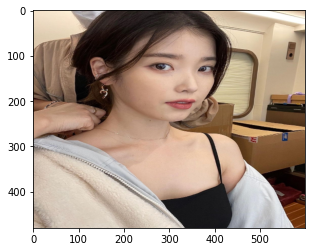

In [186]:
# 이미지 로드
image_path_side = os.getenv('HOME')+'/aiffel/exploration/miniproject/Ex03/iu_side.jpg'
img_bgr_side = cv2.imread(image_path_side)
img_bgr_side = cv2.resize(img_bgr_side, (600, 480))
img_show_side = img_bgr_side.copy()
img_rgb_side = cv2.cvtColor(img_bgr_side, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_side)
plt.show()

In [187]:
# face detection

# detector_hog를 이용한 얼굴 bounding box 추출
dlib_rects_side = detector_hog(img_rgb_side, 1)

print(dlib_rects_side)  # 얼굴 bbox 좌표

rectangles[[(242, 57) (428, 242)]]


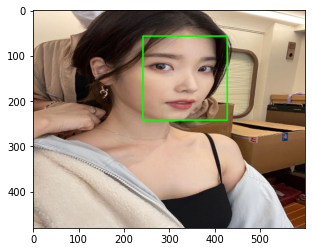

In [188]:
for dlib_rect in dlib_rects_side:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show_side, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA) 
    
img_show_rgb_side = cv2.cvtColor(img_show_side, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_side)
plt.show()

In [189]:
list_landmarks_side = []

for dlib_rect in dlib_rects_side:
    points = landmark_predictor(img_rgb_side, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks_side.append(list_points)
    
print(len(list_landmarks_side[0]))

68


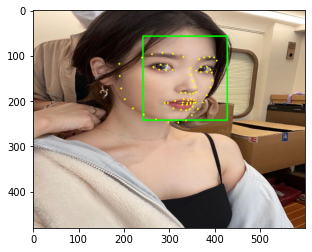

In [190]:
# 이미지에 landmark 출력
for landmark in list_landmarks_side:
    for point in landmark:
        cv2.circle(img_show_side, point, 2, (0, 255, 255), -1)

img_show_rgb_side = cv2.cvtColor(img_show_side, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_side)
plt.show()

In [191]:
# 스티커 적용
for dlib_rect, landmark in zip(dlib_rects_side, list_landmarks_side):
    print (landmark[30]) # 코의 index
    x_side = landmark[30][0]  # 스티커의 중앙 x 좌표
    y_side = landmark[30][1]  # 스티커의 중앙 y 좌표 
    w = dlib_rect.width()  # bbox 너비
    h = dlib_rect.width()  # bbox 높이
    print('(x,y) : (%d,%d)'%(x_side,y_side))
    print('(w,h) : (%d,%d)'%(w_side,h_side))

sticker_path_side = os.getenv('HOME')+'/aiffel/exploration/miniproject/Ex03/cat-whiskers1.png'   
img_sticker_side = cv2.imread(sticker_path_side)
img_sticker_side = cv2.resize(img_sticker_side, (w, h))
img_sticker_side = cv2.cvtColor(img_sticker_side, cv2.COLOR_BGR2RGB)
refined_x = x_side-w//2
refined_y = y_side-h//2
print('좌측 상단(x,y) : (%d,%d)'%(refined_x, refined_y))
x_shape = img_sticker_side.shape[0]
y_shape = img_sticker_side.shape[1]

print(img_sticker_side.shape)


(355, 170)
(x,y) : (355,170)
(w,h) : (187,187)
좌측 상단(x,y) : (262,77)
(187, 187, 3)


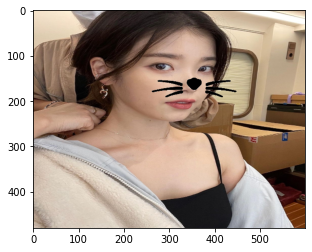

In [192]:
sticker_area_side = img_bgr_side[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape]
img_bgr_side[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape] = \
    np.where(img_sticker_side==255, sticker_area_side, img_sticker_side).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr_side, cv2.COLOR_BGR2RGB))
plt.show()

**문제점**

* 정면 사진의 경우 랜드마크의 상대적 거리가 일정해 스티커가 이질감 없이 붙어졌다.
* 반면 측면 사진의 경우 랜드마크의 거리가 일정하지 않아 붙어진 스티커의 이질감이 느껴진다. 랜드마크 거리에 따라 사진의 너비를 조정하여 거리감을 표현하면 좋을 것 같다.